## Solubility of Ibuprofen in Supercritical CO2

### Colab Adjustments

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/Python_Projects/solubility_in_sc_CO2

/content/gdrive/MyDrive/Python_Projects/solubility_in_sc_CO2


### Importing Packages

In [ ]:
from fugacity_coeff import fugacity_scf
from mixing_parameters import a_mix, a_PRK, alpha, b_mix, b_PRK, a_star, b_star, a_m_cosolvent, a_s_cosolvent, b_m_cosolvent, b_s_cosolvent
from Z_prk import Z_PRK
from P_sat import P_sat
from find_solubility import find_solubility_cosol, find_solubility
from results import write_to_excel

#from ANN.evaluate_model import evaluate_model, plot_predictions, model_predictions

In [ ]:
import numpy as np 
import sympy as sp
from sympy import pi
from sympy.abc import i
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

from IPython.display import display
from sympy.interactive import init_printing
init_printing(use_latex=True)
from sympy import pprint

### Inputs

#### Temperature and Pressure Inputs

In [ ]:
P_num = np.arange(start=100000, stop=26000000, step=100000) # Pa
T_num = 313.15 # in Kelvins
R_num = 8.314 #Pa . m3 . mol-1 . K-1

#### Binary Interaction Parameters

In [ ]:
k_num = np.array([[0,0.062,0],[0.062,0,0],[0,0,0]])
l_num = np.array([[0,0,0],[0,0,0],[0,0,0]])

#### Ibuprofen Properties

In [ ]:
# from openpyxl import load_workbook, Workbook

# wb1 = load_workbook('ExcelFiles/Joback_Method.xlsx', data_only=True)
# ws1 = wb1.active
# T_c_ibu = ws1['G36'].value # in Kelvin
# P_c_ibu = ws1['G37'].value / 10 # in MPa
# V_c_ibu = ws1['G38'].value # in cm³/mol
# w_ibu = ws1['G40'].value

In [ ]:
T_c_ibu = 749.52
P_c_ibu = 2315000
w_ibu = 0.820

In [ ]:
v_solid_num = 182.14/10**(6) # m3/mol
A_num = 28.1249 #|
B_num = 6738.77 #| Antoine Constants
C_num = -35.818 #|

In [ ]:
P_sat(A_num, B_num, C_num, T_num)

In [ ]:
P_sub_num = 0.0918

#### CO2 Properties

In [ ]:
T_c_co2 = 304.25
P_c_co2 = 7377300 # Pa
w_co2 = 0.225

### Ethanol Properties

In [ ]:
T_c_eth = 516.2
P_c_eth= 6140000 # Pa
w_eth= 0.635

### Toluene Properties

In [ ]:
T_c_tol = 591.7
P_c_tol= 4112780 # Pa
w_tol= 0.2570

### n-Heptane Properties

In [ ]:
T_c_hep = 540.2
P_c_hep= 2740000 # Pa
w_hep= 0.35

### Calculations

#### Mixing Parameters

In [ ]:
alpha_co2 = alpha(w_co2, T_num, T_c_co2)
alpha_ibu = alpha(w_ibu, T_num, T_c_ibu)
alpha_eth = alpha(w_eth, T_num, T_c_eth)
alpha_tol = alpha(w_tol, T_num, T_c_tol)
alpha_hep = alpha(w_hep, T_num, T_c_hep)

a_PRK_CO2 = a_PRK(P_c_co2, T_c_co2, R_num) * alpha_co2
a_PRK_ibu = a_PRK(P_c_ibu, T_c_ibu, R_num) * alpha_ibu
a_PRK_eth = a_PRK(P_c_eth, T_c_eth, R_num) * alpha_eth
a_PRK_tol = a_PRK(P_c_tol, T_c_tol, R_num) * alpha_tol
a_PRK_hep = a_PRK(P_c_hep, T_c_hep, R_num) * alpha_hep


b_PRK_CO2 = b_PRK(P_c_co2, T_c_co2, R_num)
b_PRK_ibu = b_PRK(P_c_ibu, T_c_ibu, R_num)
b_PRK_eth = b_PRK(P_c_eth, T_c_eth, R_num)
b_PRK_tol = b_PRK(P_c_tol, T_c_tol, R_num)
b_PRK_hep = b_PRK(P_c_hep, T_c_hep, R_num)

# print(alpha_co2, alpha_ibu, a_PRK_CO2, a_PRK_ibu, b_PRK_CO2, b_PRK_ibu)

In [ ]:
find_solubility_cosol(0.05, v_solid_num, 5900000, P_sub_num, R_num, T_num, a_PRK_CO2, a_PRK_ibu, a_PRK_hep, b_PRK_CO2, b_PRK_ibu, b_PRK_hep, k_num, l_num)

NameError: ignored

In [ ]:
find_solubility(v_solid_num, 8102500, P_sub_num, R_num, 328, a_PRK_CO2, a_PRK_ibu, b_PRK_CO2, b_PRK_ibu, k_num, l_num)

### Ibuprofen Solubility Without Colsolvent

In [ ]:
counter = 0
y_solubility = []
for i in P_num:
    y_final = find_solubility(v_solid_num, i, P_sub_num, R_num, T_num, a_PRK_CO2, a_PRK_ibu, b_PRK_CO2, b_PRK_ibu, k_num, l_num)
    y_solubility.append(y_final)
    counter += 1
    print('%{0}'.format(str(100*counter/len(P_num))))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259


ValueError: ignored

In [ ]:
write_to_excel(P_num, y_solubility,  path='ExcelFiles/y_ibu.xlsx')

ValueError: ignored

In [ ]:
print(y_solubility)

[9.804068763808359e-07, 5.23686484902549e-07, 3.7308615003935783e-07, 2.991134950234087e-07, 2.558767814852247e-07, 2.2808490484978545e-07, 2.0919029719100627e-07, 1.9592469806757652e-07, 1.864777894493437e-07, 1.7976869446169966e-07, 1.7511488585002355e-07, 1.7206668667522804e-07, 1.7031820323898254e-07, 1.6965647941396068e-07, 1.6993104130489396e-07, 1.7103491739331635e-07, 1.72892415284312e-07, 1.7545103425905912e-07, 1.7867599720524865e-07, 1.8254649302474084e-07, 1.8705306791436741e-07, 1.921958092903112e-07, 1.9798309130909928e-07, 2.0443072937024735e-07, 2.115614413994249e-07, 2.1940454691961088e-07, 2.2799585733542916e-07, 2.3737772638524253e-07, 2.475992407881764e-07, 2.5871653927970994e-07, 2.7079325450357507e-07, 2.839010772896978e-07, 2.9812044716943836e-07, 3.135413769019018e-07, 3.30264422567737e-07, 3.484018146422862e-07, 3.6807876957458674e-07, 3.8943500595211624e-07, 4.126264945077533e-07, 4.378274772292474e-07, 4.6523279789529707e-07, 4.950605947654993e-07, 5.27555416

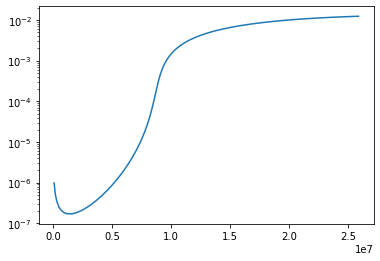

In [ ]:
plt.yscale("log")
plt.plot(P_num, y_solubility)

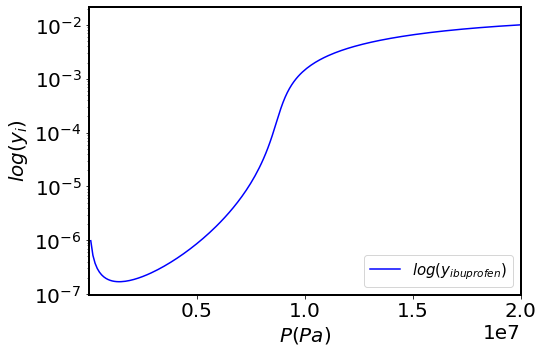

In [ ]:
# Create figure and add axes object
fig = plt.figure()

mpl.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = 20
plt.rcParams['axes.linewidth'] = 2

ax = fig.add_axes([0,0,1,1])
ax.set_xlim(0.1, 20000000)
# ax.plot(P_num, y_naph)

ax.set_xlabel('$P (Pa)$')
ax.set_ylabel('$log(y_{i})$')
ax.set_yscale("log")
ax.plot(P_num, y_solubility, color='blue', label='$log(y_{ibuprofen})$')
plt.legend(loc='lower right', prop={'size': 15})
fig.show()

In [ ]:
plt.save_

In [ ]:
df = pd.DataFrame(y_solubility)
df.to_excel('ExcelFiles/y_ibuprofen313K.xlsx', index=False)

In [ ]:
fig.savefig('/content/gdrive/MyDrive/Python_Projects/solubility_in_sc_CO2/Figures/ibu_313K1.jpg')

In [ ]:
write_to_excel(P_num, y_solubility, 'ExcelFiles/y_ibu_313_K')

ValueError: ignored

### Ibuprofen solubility in scCO2 with a cosolvent of 5% ethanol

In [ ]:
counter = 0
y_solubility_eth = []
for i in P_num:
    y_final = find_solubility_cosol(0.05, v_solid_num, i, P_sub_num, R_num, T_num, a_PRK_CO2, a_PRK_ibu, a_PRK_eth, b_PRK_CO2, b_PRK_ibu, b_PRK_eth, k_num, l_num)
    y_solubility_eth.append(y_final)
    counter += 1
    print('%{0}'.format(str(100*counter/259)))

In [ ]:
write_to_excel(P_num, y_solubility_eth,  path='ExcelFiles/y_ibu_eth.xlsx')

ValueError: ignored

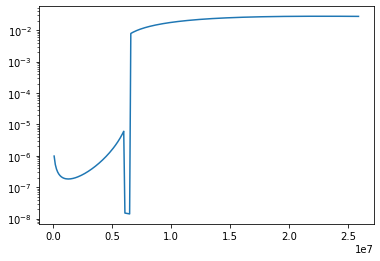

In [ ]:
plt.yscale("log")
plt.plot(P_num, y_solubility_eth)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


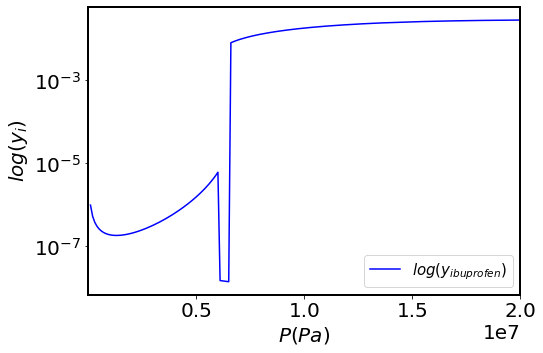

In [ ]:
# Create figure and add axes object
fig = plt.figure()

mpl.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 20
plt.rcParams['axes.linewidth'] = 2

ax = fig.add_axes([0,0,1,1])
ax.set_xlim(0.1, 20000000)
# ax.plot(P_num, y_naph)

ax.set_xlabel('$P (Pa)$')
ax.set_ylabel('$log(y_{i})$')
ax.set_yscale("log")
ax.plot(P_num, y_solubility_eth, color='blue', label='$log(y_{ibuprofen})$')
plt.legend(loc='lower right', prop={'size': 15})
fig.show()

In [ ]:
df = pd.DataFrame(y_solubility_eth)
df.to_excel('ExcelFiles/y_ibu_eth_313K.xlsx', index=False)

### Ibuprofen solubility in scCO2 with a cosolvent of 5% n_heptane

In [ ]:
counter = 0
y_solubility_hep = []
for i in P_num:
    y_final = find_solubility_cosol(0.05, v_solid_num, i, P_sub_num, R_num, T_num, a_PRK_CO2, a_PRK_ibu, a_PRK_hep, b_PRK_CO2, b_PRK_ibu, b_PRK_hep, k_num, l_num)
    y_solubility_hep.append(y_final)
    counter += 1
    print('%{0}'.format(str(100*counter/len(P_num))))

%0.3861003861003861
%0.7722007722007722
%1.1583011583011582
%1.5444015444015444
%1.9305019305019304
%2.3166023166023164
%2.7027027027027026
%3.088803088803089
%3.474903474903475
%3.861003861003861
%4.2471042471042475
%4.633204633204633
%5.019305019305019
%5.405405405405405
%5.7915057915057915
%6.177606177606178
%6.563706563706564
%6.94980694980695
%7.335907335907336
%7.722007722007722
%8.108108108108109
%8.494208494208495
%8.88030888030888
%9.266409266409266
%9.652509652509652
%10.038610038610038
%10.424710424710424
%10.81081081081081
%11.196911196911197
%11.583011583011583
%11.96911196911197
%12.355212355212355
%12.741312741312742
%13.127413127413128
%13.513513513513514
%13.8996138996139
%14.285714285714286
%14.671814671814673
%15.057915057915057
%15.444015444015443
%15.83011583011583
%16.216216216216218
%16.602316602316602
%16.98841698841699
%17.374517374517374
%17.76061776061776
%18.146718146718147
%18.53281853281853
%18.91891891891892
%19.305019305019304
%19.69111969111969
%20.0772

ValueError: ignored

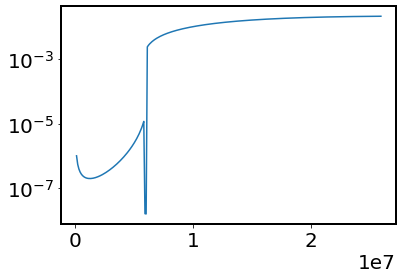

In [ ]:
plt.yscale("log")
plt.plot(P_num, y_solubility_hep)

In [ ]:
df = pd.DataFrame(y_solubility_hep)
df.to_excel('y_iu_hep1.xlsx', index=False)

### Compare Results

In [ ]:
df = pd.read_excel('ExcelFiles\y_naph_PRK.xlsx')
P_num = df[1]
y_naph = df[0] 

In [ ]:
df = pd.read_excel('ExcelFiles\y_naph_PRK_coethanol.xlsx')
P_eth = df[1]
y_naph_eth = df[0]

In [ ]:
df = pd.read_excel('ExcelFiles\y_naph_PRK_co_nheptane.xlsx')
P_hep = df[1]
y_naph_hep = df[0] 

In [ ]:
# Create figure and add axes object
fig = plt.figure()

mpl.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = 20
plt.rcParams['axes.linewidth'] = 2

ax = fig.add_axes([0, 0, 1, 1])
ax.set_xlim(0.1, 20)
ax.plot(P_eth, y_naph_eth, color='red', label='$ethanol$')
ax.plot(P_hep, y_naph_hep, color='b', label='$n-heptane$')
# ax.plot(P_num, y_naph)

plt.xlabel('$P (MPa)$')
plt.ylabel('$log(y_{i})$')
plt.legend(loc='lower right', prop={'size': 15})
plt.yscale("log")
plt.show()